# Lab 2  : 영상을 이용한 기본적인 텐서플로 연산

Matplotlib를 사용할 수 있기 위한 여러 준비를 수행한다.

In [4]:
# plotting이 가능하게 함 %pylab은 magic function(short cut명령어들을 수행)이라고 불리고
# matplotlib를 사용할 수 있기 위한 함수들을 import함.

%pylab               

# matplotlib을 inline에서 사용할 수 있게 함.
%matplotlib inline  

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


웹으로부터 https://s3.amazonaws.com/cadl/celeb-align/ 로부터 사회저명인사(celebrity)의 jpg 사진들을 다운받은 후에 files내에 저장한다. 

In [2]:
plt.style.use('ggplot')  # 좀 더 예쁜 스타일로 출력이 되게 한다. 

from libs import utils  # utils파일내의 함수들을 import한다.
files = utils.get_celeb_files()    # 웹으로부터 저명인사 jpg파일들을 다운 받은 후
                                   # img_align_celeba폴더에 저장한 후에
                                   # files에 저장한다.

사진이 잘 들어갔는지 확인:

In [6]:
img = plt.imread(files[50])   # files내의 50번째 영상을 읽어서 img안에 넣는다.
print(img)  # 이 영상(img)의 값들을 숫자로 볼 수 있다. RGB채널에 해당하는 정수값들이 
            # 나온다. 

[[[178 185 191]
  [182 189 195]
  [149 156 162]
  ..., 
  [216 220 231]
  [220 224 233]
  [220 224 233]]

 [[177 184 190]
  [182 189 195]
  [153 160 166]
  ..., 
  [215 219 230]
  [220 224 233]
  [220 224 233]]

 [[177 184 190]
  [182 189 195]
  [161 168 174]
  ..., 
  [214 218 229]
  [219 223 232]
  [219 223 232]]

 ..., 
 [[ 11  14  23]
  [ 11  14  23]
  [ 11  14  23]
  ..., 
  [  4   7  16]
  [  5   8  17]
  [  5   8  17]]

 [[  9  12  21]
  [  9  12  21]
  [  9  12  21]
  ..., 
  [  8  11  18]
  [  5   8  17]
  [  5   8  17]]

 [[  9  12  21]
  [  9  12  21]
  [  9  12  21]
  ..., 
  [  8  11  18]
  [  5   8  17]
  [  5   8  17]]]


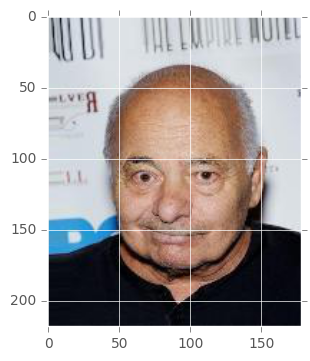

In [7]:
plt.imshow(img)     #  이 영상(img)을 영상으로 볼 수 있다. 

이 영상의 크기 정보를 확인:

In [8]:
img.shape      # 이 영상의 크기와 channel을 출력한다. 
               # 출력결과   (218 , 178, 3)   --> 세로 218, 가로 178, 
               # channel이 3(Red, Green, Blue)인 영상이다. 

(218, 178, 3)

R,G,B 각 채널을 영상으로 보여준다.

In [ ]:
plt.imshow(img[:,:,0],cmap='gray')    # red 채널을 gray로 뿌려준다. 
plt.imshow(img[:,:,1],cmap='gray')    # green 채널을 gray로 뿌려준다. 
plt.imshow(img[:,:,2],cmap='gray')    # blue 채널을 gray로 뿌려준다. 

다음에 IU라는 서브디렉토리안에 있는 사진을 loading해보자.

In [3]:
import os        # os에 관계된 라이브러리들을 import한다.  
dirname = 'IU'   # 디렉토리명(dirname)을 'IU'로 한다. 

# dirname이라는 디렉토리 안에 있는 모든 파일을 filenames에 저장한다. 
filenames = [os.path.join(dirname, fname)   # 밑에서 얻은 파일들을 [](배열)안에 추가 
             for fname in os.listdir(dirname)]   #dirname내의 모든 파일명을 얻는다. 

In [4]:
img = plt.imread(filenames[0])

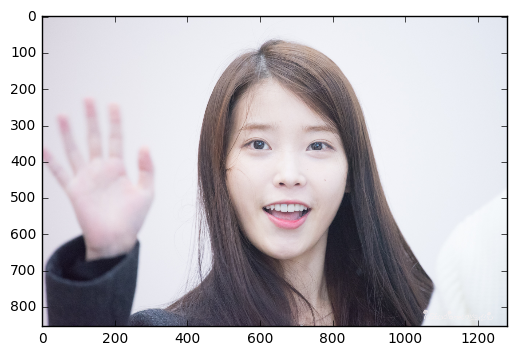

In [5]:
plt.imshow(img) 

img_align_celeba폴더내의 100개의 영상에 대해서 영상을 얻어서 imgs에 넣는다.

In [5]:
imgs = utils.get_celeb_imgs()   # 모든 영상을 imgs에 넣는다.

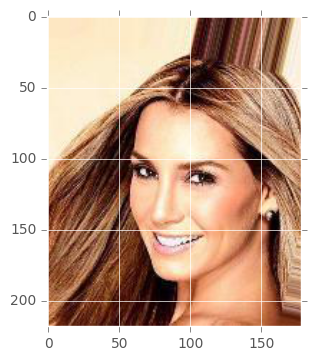

In [6]:
plt.imshow(imgs[0])    # imgs내의 첫번째 영상을 보여준다. 

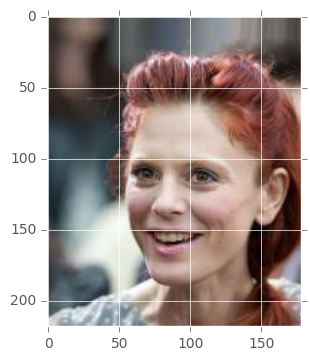

In [10]:
plt.imshow(imgs[1])    # imgs내의 두번째 영상을 보여준다.

imgs의 영상을 numpy array로 변환한 후에 크기를 살펴보자.

N x H x W x C의 형태로 출력이 되는데, 여기서 N은 영상의 갯수, H는 영상의 높이, W는 영상의 길이, C는 영상의 채널수를 나타낸다.

In [8]:
data =np.array(imgs)
print(data.shape)      #   출력 : (1000,218,178,3)
                       #   batch * width * height * channels이 출력됨.
                       #  가로 218, 세로 178, 채널이 3개인 영상이 100개가 4차원으로 
                       #  저장된 형태임.

(100, 218, 178, 3)


In [10]:
mean_img = np.mean(data,axis = 0)     # batch에 있는 영상들의 평균을 보여줌
                                      # axis =0, 즉, 0번 축을 기준으로 평균을 수행함.
     
print(mean_img.shape)

(218, 178, 3)


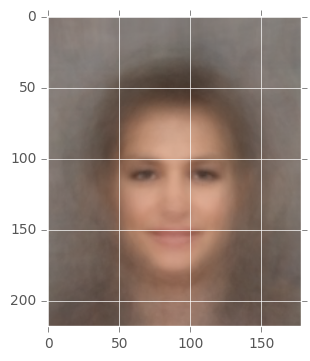

In [11]:
plt.imshow(mean_img.astype(np.uint8)) # 평균인 영상을 그림으로 나타나게 함. 

위 영상은 100명의 저명인사의 평균적인 영상을 보여주고 있다. 다음은 이 영상들의 분산을 구해보자.

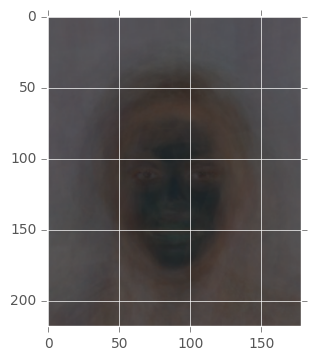

In [12]:
std_img = np.std(data, axis=0) # 0번축을 기준으로 한 standard deviation을 구함.
plt.imshow(std_img.astype(np.uint8)) # 영상으로 출력함.

위 영상에서 어두운 영역은 표준편차가 작은 영역을 나타낸다. 즉, 얼굴 색깔은 비교적 모두 비슷하기 때문에 표준편차가 작은 반면에 머리카락의 색깔은 좀 더 다양하기 때문에 표준편차가 상대적으로 크다.

In [59]:
import numpy as np
x = np.linspace(-3.0,3.0,100)  #  -3.0~3.0 사이를 100등분한 값들을 출력함.
print(x)  # 출력: 100개 값이 모두 출력됨.

print(x.shape) # 출력:(100,)

print(x.dtype) # 출력:float64

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

텐서플로우는 당장에 계산이 일어나지 않고, 일단 모든 것을 그래프로 정의한 후에 나중에 계산하는 과정이다. 즉, 일어나기를 원하는 모든 연산을 먼저 그래프로 정의한다. (연산 그래프안에 모든 것이 정의되어 있음). 그 후에 그래프안에 있는 모든 것에 대한 계산을 수행함. 이때 세션을 이용함.


In [7]:
plt.close('all')
import tensorflow as tf

x = tf.linspace(-3.0,3.0,100)
print(x)

Tensor("LinSpace:0", shape=(100,), dtype=float32)


값은 출력되지 않는다. 다만 tf operation이 나올 뿐이다. 
즉, 기존의 tensor graph에 더해진 연산의 출력형태, 즉 출력으로 나오는 텐서(tensor)의 형태가 출력된다. 여기서 텐서란 다차원 행렬 정도로 이해할 수 있다. 그런데 한 개의 값도 1x1크기의 행렬로 볼 수 있고, 벡터도 하나의 축을 가진 행렬로 이해할 수 있기 때문에 텐서란 한 개의 값, 벡터, 행렬을 모두 포함하는 넓은 의미의 개념으로 볼 수 있다.
실제 값이 출력되려면 세션을 열어서 그래프를 세션에 넣은 상태에서 값을 입력으로 주고 세션을 run시켜야 한다.

![title](img/sess.jpg)

계산을 수행하기 위해 세션을 연다.

In [ ]:
sess = tf.Session()

computed_x = sess.run(x) # tf.graph에 있는 연산을 계산해달라고 session한테 명령함. 

print(computed_x) # 계산 결과가 나온다.

또는 다음과 같이도 할 수 있다.

In [ ]:
computed_x = x.eval(session=sess)  #x의 값을 계산(eval)할 때  sess라는 세션을 사용해라.
print(computed_x) # 결과를 출력함.
sess.close() # 세션을 닫는다.

인터앱티브 세션을 열어넣는 방법도 있다. 

In [6]:
sess = tf.InteractiveSession() # 인터액티브 세션을 연다.

x = tf.linspace(-3.0,3.0,100)
x.eval()
print(x.get_shape())                #       출력: (100, )
print(x.get_shape().as_list())      #       출력: [100]

(100,)
[100]


 x list안의 모든 값에 대하여 다음과 같은 z값(가우시안)들을 계산한다. 
 
 $$ z = \frac{\sqrt{2\pi}}{\sigma} e^{\frac{-(x-m)^2}{2 \sigma^2}}      (1)$$      

In [9]:
mean = 0  # 평균
sigma = 1.0   
#다음은 x list내의 값들에 대해서 (1) 식에 의해 계산된 값들이 z벡터안에 원소로 들어간다.
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) / (2.0 * tf.pow(sigma, 2.0))))
     * (1.0 / sigma * tf.sqrt(2.0 * 3.1415))) # 아직 계산한 것이 아니라 
                                              # 연산들을 정의만 한 것이다.    

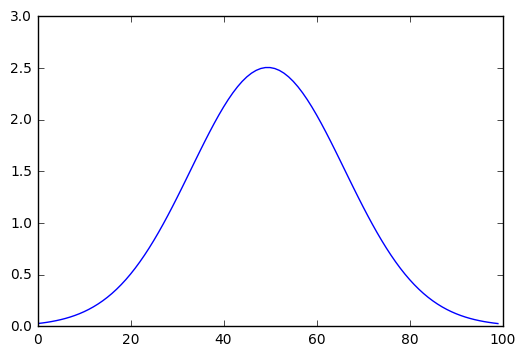

In [10]:
res = z.eval()  # 인터액티브 모드라서 가능
plt.plot(res)

z벡터의 크기를 얻는다.

In [10]:
ksize = z.get_shape().as_list()[0]
print(ksize)

100


z벡터를 하나는 [ksize,1]모양의 벡터로 다른 하나는 [1,ksize]벡터로 reshape한 후에 서로 곱한다. 결과는 [ksize,ksize] 행렬이다.

In [40]:
z_2d = tf.matmul(tf.reshape(z,[ksize, 1]),tf.reshape(z,[1, ksize])) #2차원 가우시안

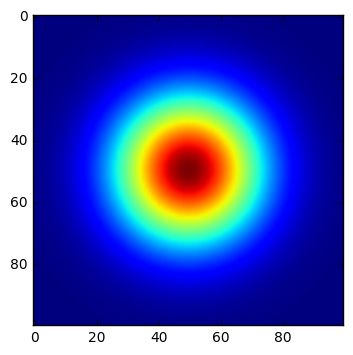

In [18]:
plt.imshow(z_2d.eval())

Camera맨을 불러읽어서 출력해보자. skimage는 영상을 불러읽는 객체 등이 담겨 있는 라이브러리이다.

(512, 512)


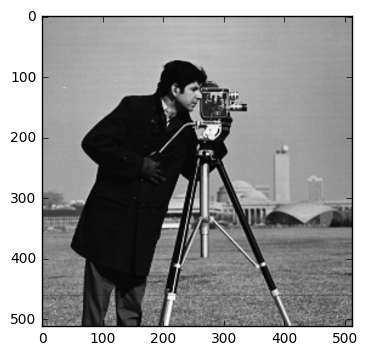

In [58]:
from skimage import data
img = data.camera().astype(np.float32)
plt.imshow(img, cmap='gray')
print(img.shape)

텐서플로에서 사용하는 컨볼루션 관련 함수를 사용하려면 영상을 4차원의 형태, 즉, N x H x W x C의 형태로 저장해야 한다. 즉, 현재 2차원인 영상을 4차원으로 늘리는데, 영상의 갯수와 영상의 채널이 각각 1이 되는 축들을 추가한다.
즉, N x H x W x C의 형태가 되도록, N=1, C=1으로 해서 H x W --> 1 x H x W x 1 으로 늘린다.

In [1]:
import tensorflow as tf
img_4d = tf.reshape(img,[1,img.shape[0],img.shape[1],1]) #N=1, C=1을 추가함

img_4d.get_shape().as_list() 

NameError: name 'img' is not defined

이번에는 컨볼루션에 사용할 filter를 4차원으로 만든다. filter의 경우는 4차원이지만, 영상과는 그 형태가 다르다. 즉, N x H x W x C의 형태가 아니라 H_k x W_k x I x O의 형태인데, 여기서 H_k는 kernel의 높이, W_k는 kernel의 넓이, I는 입력영상의 채널이고, O는 출력영상의 채널을 의미한다. 

In [23]:
# z_2d를 z_4d로 형태를 맞춘다.
z_4d = tf.reshape(z_2d, [100, 100, 1, 1])
print(z_4d.get_shape().as_list())

[100, 100, 1, 1]


컨볼루션을 수행한다. 여기서 strides[1,1,1,1]에서 첫번째와 네번째는 항상 1로 놓고, 두번째는 1은 필터(또는 커널)이 가로로 1만큼씩 이동하면서 컨볼루션한다는 뜻이고, 세번째 1은 필터가 세로로 1만큼씩 이동하면서 컨볼루션한다는 뜻이다.

In [22]:
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 1, 1, 1], padding='SAME')
res = convolved.eval()
print(res.shape)

(1, 512, 512, 1)


strides[1,2,2,1]로 놓으면 필터가 가로, 세로로 2만큼씩 이동하면서 컨볼루션이 수행된다.

In [25]:
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 2, 2, 1], padding='SAME')
res = convolved.eval()
print(res.shape)

(1, 256, 256, 1)


(256, 256)


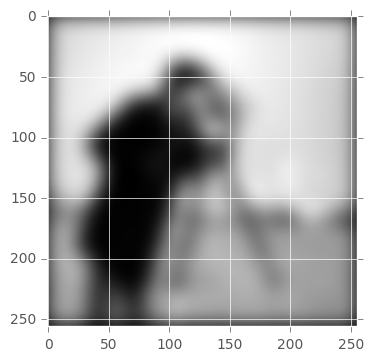

In [27]:
res2 = np.squeeze(res) #squeeze함수는 크기가 1인 차원을 없애준다. 
print(res2.shape)
plt.imshow(res2, cmap='gray')

또는 내가 imshow로 보여주기를 원하는 정보가 무엇인지를 정확하게 표시해서 보여줄 수도 있다. 다음은 첫번째, 네번째 축은 0번째 요소를 두번째와 세번째 축은 모든 (:) 요소를 표시하라는 명령이다.

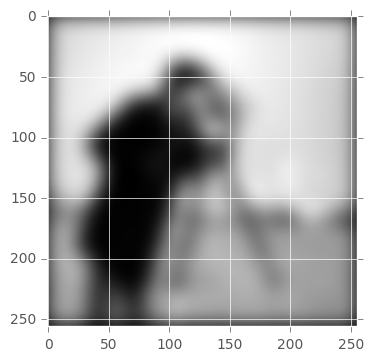

In [28]:
plt.imshow(res[0, :, :, 0], cmap='gray') 

## 연습 #1 : 크기가 50x50인 가우시안 필터를 만들고 카메라 영상과의 컨볼루션의 결과를 출력해보기(10분)

## Gabor Filter를 이용한 컨볼루션

이번에는 Gabor Filter를 이용한 컨볼루션을 수행하고자 한다 Gabor Filter를 만들기 위해서 다음과 같이 -3.0~3.0까지를 백등분한 값들을 가진 xs벡터를 먼저 정의한다. 

In [3]:
import tensorflow as tf

xs = tf.linspace(-3.0, 3.0, 100)

다음에 이 xs의 값들에 대한 sin함수값들을 얻는다.

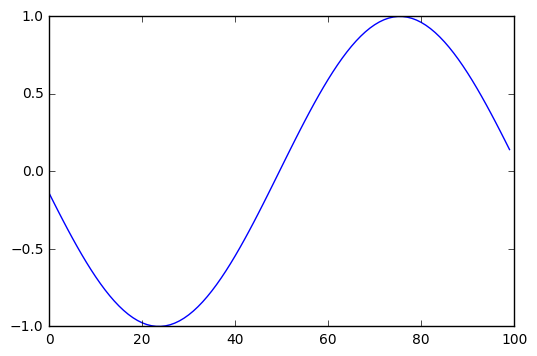

In [19]:
ys = tf.sin(xs)
plt.figure()
plt.plot(ys.eval())

In [22]:
ys = tf.reshape(ys, [ksize, 1]) # ys를 [100 1] 크기의 행렬로 변환

In [23]:
print(ys.get_shape())

(100, 1)


In [14]:
ones = tf.ones((1, ksize))  # 값이 모두 1인 [1 100] 크기의 행렬을 생성

In [24]:
wave = tf.matmul(ys, ones) #[100 1] x [1 100]을 연산하여 [100 100]크기의 행렬을 생성함

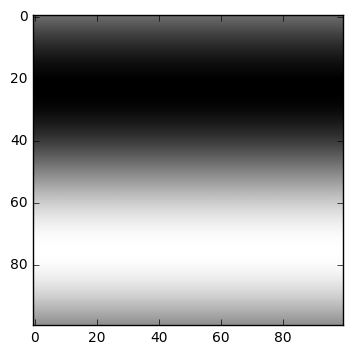

In [25]:
plt.imshow(wave.eval(), cmap='gray')

이것을 앞에서 생성한 가우시안 필터와 곱하기를 하여 gabor필터를 얻게 된다.

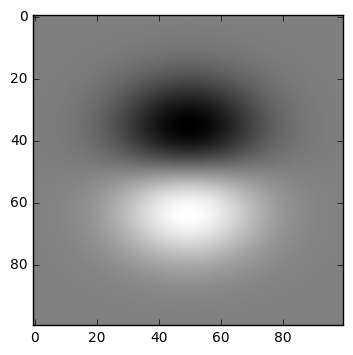

In [42]:
 # matmul과 mul의 차이점 : mul은 같은 위치의 원소들간에 곱이 됨
gabor = tf.mul(wave, z_2d)
plt.imshow(gabor.eval(), cmap='gray')

영상을 입력으로 넣을 placeholder를 만들고 형태를 None x None으로 한다. 영상의 크기를 입력할 당시에 정한다는 뜻이다.

In [63]:
img = tf.placeholder(tf.float32, shape=[None, None], name='img')
print(img.get_shape())

(?, ?)


컨보루션을 수행하기 위해 이 영상을 4차원으로 만드는데, 이번에는 expand_dims라는 함수를 이용하여 4차원으로 만든다. 먼저 2차원 [None None]형태인 img를 형태가 [None None 1]인 3차원 행렬로 확장(expand)한다. 

In [64]:
img_3d = tf.expand_dims(img, 2)  # 축을 하나 추가하고 이것을 2번축으로 놓기
                                 # 현재는 0번,1번 축만 있는 상태
dims = img_3d.get_shape()
print(dims)

(?, ?, 1)


[1 None None 1]형태의 4차원 행렬을 얻기 위해 다시 한번 축을 하나 더 만든다.

In [65]:
# And again to get: 1 x H x W x 1
img_4d = tf.expand_dims(img_3d, 0) # 축을 하나 추가하고 이를 0번 축으로 놓는다. 
                                   # 원래의 0번축은 1번축이 되고, 
                                   # 원래의 1번축은 2번축이 되고, 
                                   # 원래의 2번축은 3번축이 된다.
                            
print(img_4d.get_shape().as_list())

[1, None, None, 1]


In [66]:
# Gabor필터의 파라미터를 나중에 입력값으로 줄 수 있도록 placeholder로 놓는다.
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

In [67]:
x = tf.linspace(-3.0, 3.0, ksize)
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
z_2d = tf.matmul(
  tf.reshape(z, tf.pack([ksize, 1])),
  tf.reshape(z, tf.pack([1, ksize])))
ys = tf.sin(x)

In [51]:
print(ys)

Tensor("Sin_4:0", shape=(?,), dtype=float32)


In [68]:
ys = tf.reshape(ys, tf.pack([ksize, 1])) # tf.pack를 이용하여 축으르 하나 추가한다.
print(ys)

Tensor("Reshape_10:0", shape=(?, 1), dtype=float32)


In [69]:
ones = tf.ones(tf.pack([1, ksize]))
wave = tf.matmul(ys, ones)
gabor = tf.mul(wave, z_2d)
gabor_4d = tf.reshape(gabor, tf.pack([ksize, ksize, 1, 1]))

그리고 2개를 컨볼루션한다.

In [70]:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME', name='convolved')
convolved_img = convolved[0, :, :, 0]

단순히 이를 계산하려고 하면 에러가 난다. placeholder의 입력값을 주지 않았기 때문이다.

In [55]:
convolved_img.eval()

InvalidArgumentError: You must feed a value for placeholder tensor 'ksize' with dtype int32
	 [[Node: ksize = Placeholder[dtype=DT_INT32, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'ksize', defined at:
  File "/usr/local/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.4/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.4/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.4/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.4/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.4/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.4/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.4/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-49-44834ac07835>", line 4, in <module>
    ksize = tf.placeholder(tf.int32, name='ksize')
  File "/usr/local/lib/python3.4/site-packages/tensorflow/python/ops/array_ops.py", line 1332, in placeholder
    name=name)
  File "/usr/local/lib/python3.4/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1748, in _placeholder
    name=name)
  File "/usr/local/lib/python3.4/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.4/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.4/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'ksize' with dtype int32
	 [[Node: ksize = Placeholder[dtype=DT_INT32, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


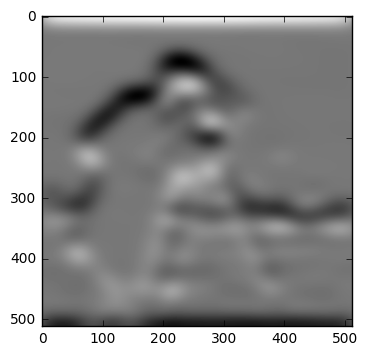

In [71]:
res = convolved_img.eval(feed_dict={
    img: data.camera(), mean:0.0, sigma:1.0, ksize:100})
plt.imshow(res, cmap='gray')

입력으로 sigma나 ksize값을 다르게 주고 해본다.

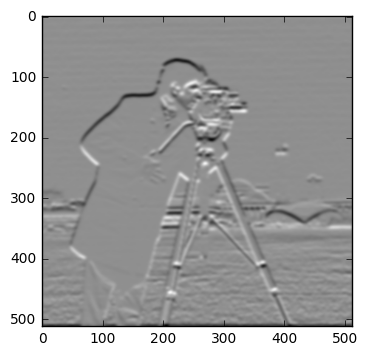

In [72]:
res = convolved_img.eval(feed_dict={
    img: data.camera(),
    mean: 0.0,
    sigma: 0.5,
    ksize: 32
  })
plt.imshow(res, cmap='gray')

## 연습 #2 : 크기가 50x50인 가우시안 필터를 만들고 카메라 영상과의 컨볼루션 하는데 여기서 가우시안 필터의 파라미터를 placeholder로 주는 프로그램을 작성해서 출력해보기(20분)